DS 8014 Graph Mining
Assignment 5

Gorkem Sarp;
Richa Sharma

Que 1:

Some of the code was taken from our labs

In [9]:
#! pip install python-igraph
#! pip install plfit
#! pip install partition-igraph
#!pip3 install -U pip
#!pip3 install -U setuptools
#!pip3 install --no-cache-dir cairocffi
#!pip install umap-learn

In [10]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from collections import Counter
import os
import umap
import pickle
import partition_igraph
import subprocess
from sklearn.metrics import adjusted_mutual_info_score as AMI

## we used those for the book, but you can change to other colors
cls_edges = 'gainsboro'
cls = ['silver','dimgray','black']

In [11]:
z = ig.Graph.Famous('zachary')
z.vs['size'] = 12
#print("Number of edges:",z.ecount())
#print("vertices:",z.vcount())
z.vs['name'] = [str(i) for i in range(z.vcount())]
#print(z.vs['name'])
z.vs['label'] = [str(i) for i in range(z.vcount())]

z.vs['label_size'] = 8
#print(z.vs['label_size'])
z.es['color'] = cls_edges
#print(z.es['color'])
z.vs['comm'] = [0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]
#print(len(z.vs['comm']))

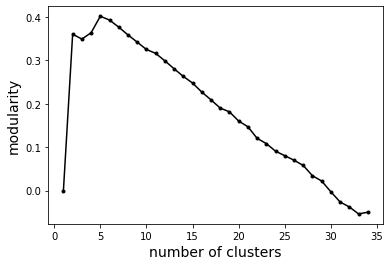

In [12]:
## compute modularity at each possible cut and plot for Girvan newman
gn = z.community_edge_betweenness()
q = []
a = []
max_mod = 0 
max_mod_cluster = 0
gn = z.community_edge_betweenness()

for i in np.arange(z.vcount()):
    q.append(z.modularity(gn.as_clustering(n=i+1)))
    #a.append(AMI(z.vs['comm'],gn.as_clustering(n=i+1).membership))

plt.plot(np.arange(1,1+z.vcount()),q,'.-',color='black',label='modularity')
#plt.plot(np.arange(1,1+z.vcount()),a,'.-',color='grey',label='AMI')    

plt.xlabel('number of clusters',fontsize=14)
plt.ylabel('modularity',fontsize=14);
#plt.savefig('zachary_modularity.eps');

In [13]:
D_modularity = pd.DataFrame(np.array([q]).transpose(),columns=['q'])
D_modularity['q'].max()

0.40129848783694944

In [14]:
D_modularity.head()

,q
0,0.000000
1,0.359961
2,0.348784
3,0.363248
4,0.401298


In [15]:
print("maximum modularity is 0.40129848783694944, corresponding to 5 clusters")

maximum modularity is 0.40129848783694944, corresponding to 5 clusters


In [16]:
ECG = AMI(z.community_ecg().membership, z.vs['comm'])
print("AMI of ECG Algorithm:", ECG)
louvain =  AMI(z.community_multilevel().membership, z.vs['comm'])
print("AMI of Louvain Algorithm:", louvain)
info_map = AMI(z.community_infomap().membership, z.vs['comm'])
print("AMI of Infomap Algorithm:", info_map)
label_prop =  AMI(z.community_label_propagation().membership, z.vs['comm'])
print("AMI of Label Propagation Algorithm:", label_prop)

## As calculated in the above cells Girvan Newman gives higher moduarity at 5 clusters. Therefore we used 5 clusters,
## eventhough AMI is higher with 2 clusters
GN =  AMI(z.community_edge_betweenness().as_clustering(n=5).membership, z.vs['comm'])
print("AMI of Girvan Newman Algorithm:", GN)


CNM = AMI(z.community_fastgreedy().as_clustering().membership, z.vs['comm'])
print("AMI of CNM Algorithm:", CNM)

AMI of ECG Algorithm: 0.5653497612707895
AMI of Louvain Algorithm: 0.5653497612707895
AMI of Infomap Algorithm: 0.6874223479049212
AMI of Label Propagation Algorithm: 0.6823390581187847
AMI of Girvan Newman Algorithm: 0.5499173029289166
AMI of CNM Algorithm: 0.6807645098886008
